In [4]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import numpy as np
from common import Fonts, Images, add_twitter_handle

In [5]:
year = "2019"

In [24]:
df_cum = pd.read_csv("golden_boot_" + year + ".csv", index_col=0)
df_cum = df_cum.iloc[0:5]
df_cum.columns = pd.to_datetime(df_cum.columns)
df_cum

,2019-04-13,2019-04-14,2019-04-15,2019-04-16,2019-04-17,2019-04-18,2019-04-19,2019-04-20,2019-04-21,2019-04-22,...,2019-10-03,2019-10-04,2019-10-05,2019-10-06,2019-10-07,2019-10-08,2019-10-09,2019-10-10,2019-10-11,2019-10-12
player,,,,,,,,,,,,,,,,,,,,,
Sam May Kerr,1,1,1,1,1,1,1,2,2,2,...,18,18,18,18,18,18,18,18,18,18
Lynn Williams,0,0,0,0,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
Amy Rodriguez,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,9
Kristen Hamilton,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Christine Sinclair,0,0,0,0,0,0,0,3,3,3,...,9,9,9,9,9,9,9,9,9,9


<Figure size 1440x1440 with 0 Axes>

<Figure size 8000x8000 with 0 Axes>

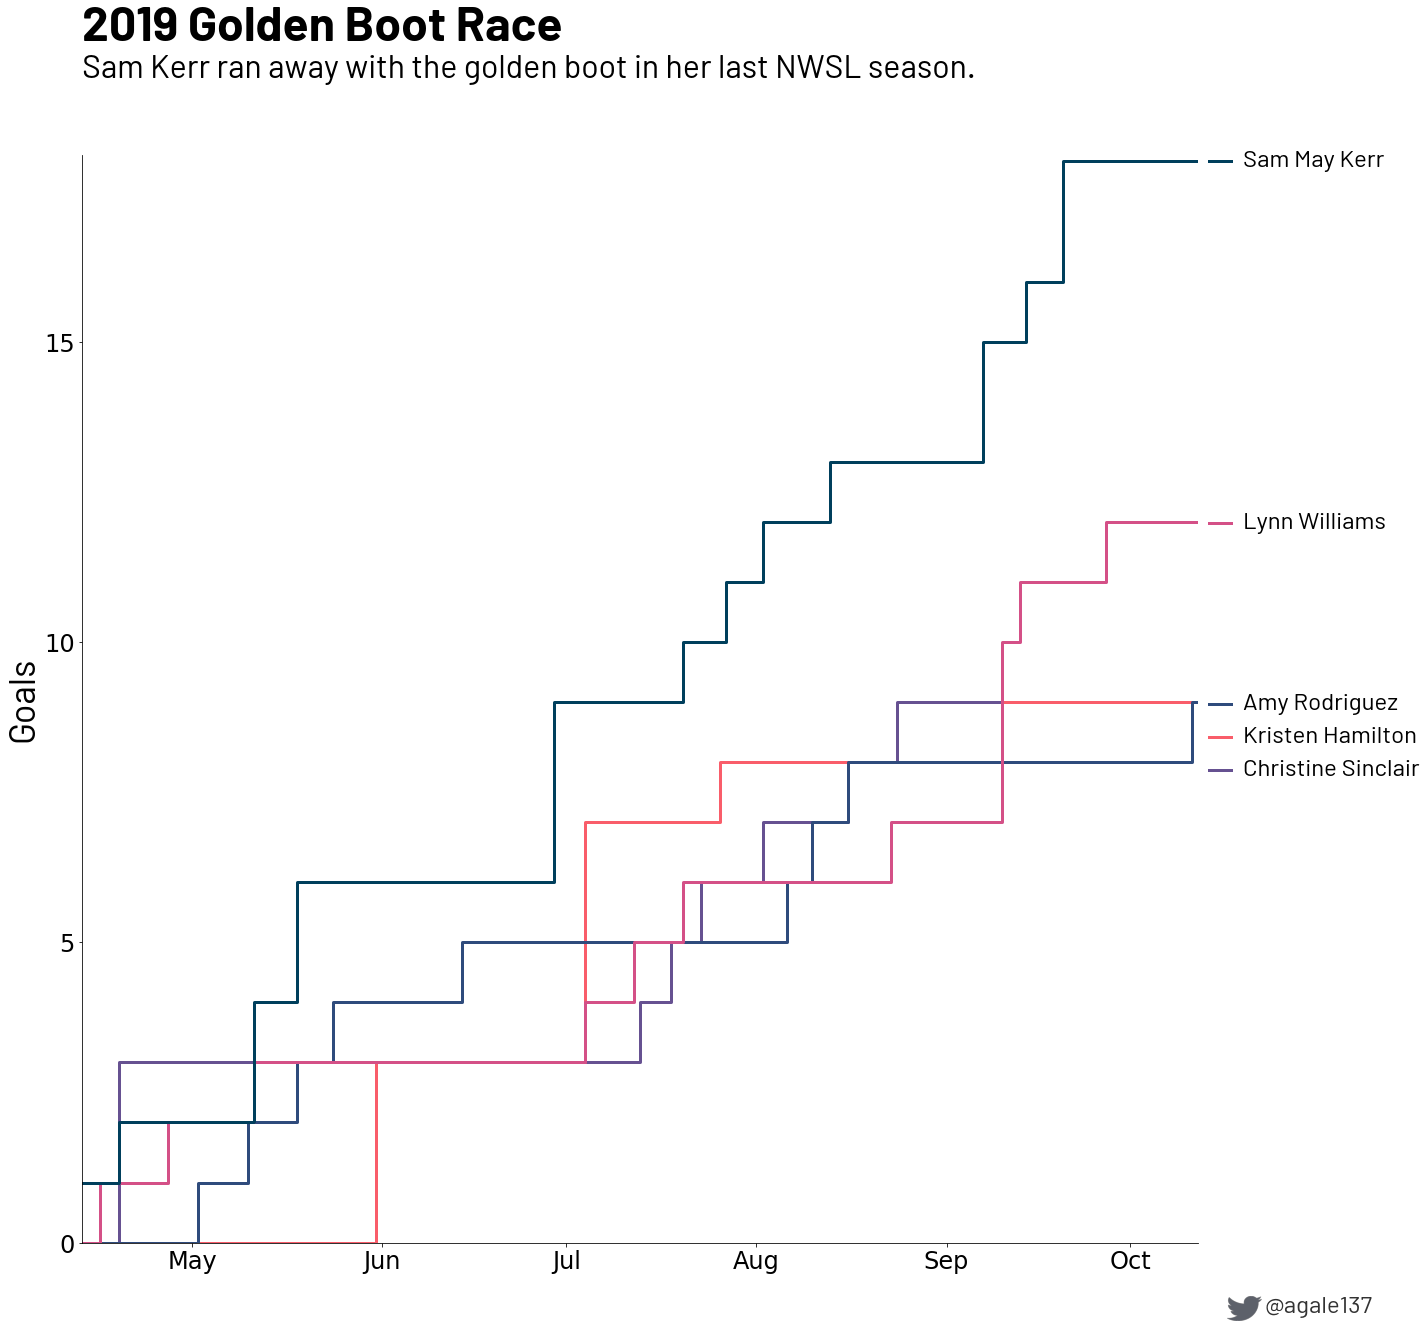

In [27]:
# General
plt.clf()
plt.rcParams["figure.figsize"] = (20, 20)
plt.figure(dpi=400, facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")

# Colors
n_colors = 8
colors = [
    "#003f5c",
    "#d45087",
    "#2f4b7c",
    "#f95d6a",
    "#665191",
    "#ff7c43",
    "#a05195",
    "#ffa600",
]

# Plot data
count = {}
for i, (name, row) in enumerate(df_cum.iterrows()):
    ax.step(
        df_cum.columns,
        row,
        label=i,
        linewidth=3,
        color=colors[i % n_colors],
        zorder=-1 * i,
    )

    offset = 0
    goals = row[-1]
    if goals in count:
        offset = count[goals]
        count[goals] = offset + 1
    else:
        count[goals] = 1

    y = row[-1] / df_cum.max().max() - offset * 0.03 - 0.005

    ax.text(
        1.04,
        y,
        name,
        transform=ax.transAxes,
        color="black",
        fontsize=24,
        fontproperties=Fonts.BARLOW,
        fontweight="bold",
        va="center",
        ha="left",
    )

    plt.plot(
        [1.01, 1.03],
        [y, y],
        transform=ax.transAxes,
        linewidth=3,
        color=colors[i % n_colors],
        clip_on=False,
    )

# Title
plt.title(
    year + " Golden Boot Race",
    fontproperties=Fonts.BARLOW_BOLD,
    size=48,
    ha="left",
    x=0,
    y=1.1,
)
plt.suptitle(
    "Sam Kerr ran away with the golden boot in her last NWSL season.",
    fontproperties=Fonts.BARLOW,
    size=32,
    ha="left",
    x=0.125,
    y=0.95,
)

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which="major", labelsize=24)
ax.set_ylim(0, df_cum.max().max() + 0.1)
plt.locator_params(axis='y', nbins=4) 
ax.set_xlim([df_cum.columns[0], df_cum.columns[-1]])
plt.ylabel("Goals", fontproperties=Fonts.BARLOW, size=36)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

add_twitter_handle(fig, x=0.92, y=0.07, fs=24, w=0.02)

# Save image
plt.savefig("golden_boot_" + year + ".png", bbox_inches="tight", pad_inches=0.5)